In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
gDNA_c_file = '/project2/kribelba_1515/saadawy/barcode_gDNA_counts_upstream.tsv'
mRNA_c_file = '/project2/kribelba_1515/saadawy/barcode_mRNA_counts_upstream.tsv'
barcode_mapping_file = '/project2/kribelba_1515/saadawy/mapping_filtered_upstream.tsv'

In [3]:
gDNA_counts = pd.read_csv(gDNA_c_file, sep='\t')
mRNA_counts = pd.read_csv(mRNA_c_file, sep='\t')
barcode_mapping = pd.read_csv(barcode_mapping_file, sep='\t')

In [4]:
gDNA_counts

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,gDNA_rep4
0,TAGTCTGATTCC,66,0,7,113
1,TCCGTTTTCCGT,96,0,0,0
2,TTGCCGTCGTAG,45,99,42,0
3,TGCTAAACCATG,442,201,146,184
4,TTCGCACCATAT,236,0,406,487
...,...,...,...,...,...
394863,ACAAGGCAGCGA,0,0,0,1
394864,CGTCGTTTAACA,0,0,0,1
394865,ACGGAATGAGCC,0,0,0,1
394866,GTCATTAAAGGT,0,0,0,1


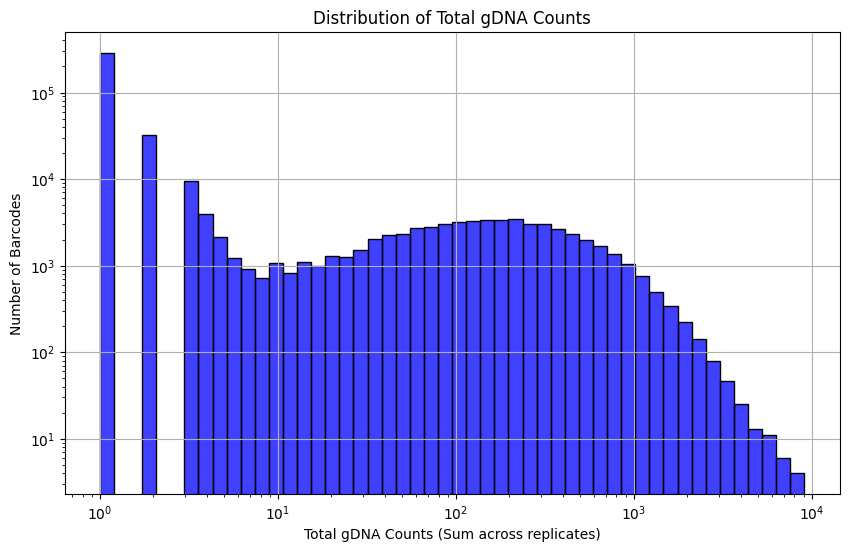

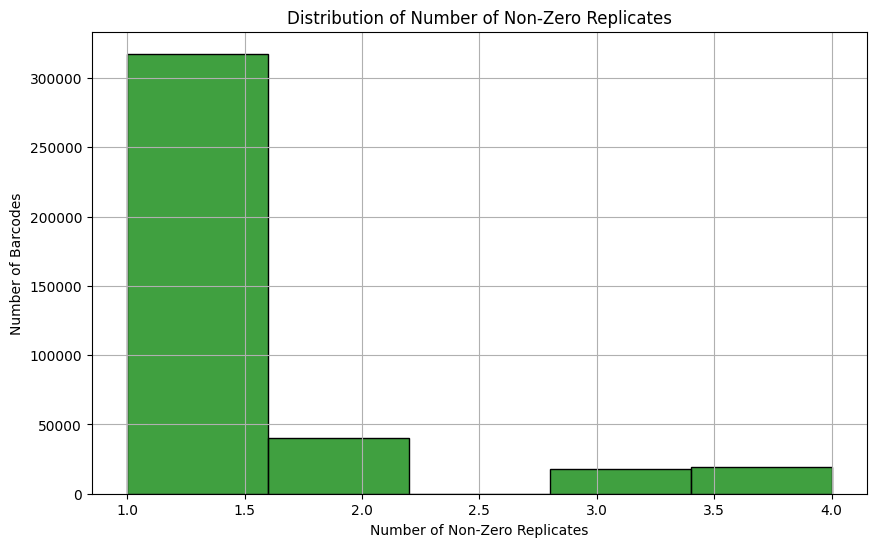

In [5]:
gDNA_visualization = gDNA_counts.copy()
gDNA_replicate_cols = ['gDNA_rep1', 'gDNA_rep2', 'gDNA_rep3', 'gDNA_rep4']
gDNA_visualization['Total_gDNA_Count'] = gDNA_visualization[gDNA_replicate_cols].sum(axis=1)
gDNA_visualization['Number_Non_Zero_Replicates'] = (gDNA_visualization[gDNA_replicate_cols] > 0).sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(gDNA_visualization['Total_gDNA_Count'], bins=50, color='blue', kde=False, log_scale=(True))

plt.xlabel('Total gDNA Counts (Sum across replicates)')
plt.ylabel('Number of Barcodes')
plt.title('Distribution of Total gDNA Counts')

plt.xticks()
plt.yticks()
plt.yscale('log')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(gDNA_visualization['Number_Non_Zero_Replicates'], bins=5, color='green', kde=False)

plt.xlabel('Number of Non-Zero Replicates')
plt.ylabel('Number of Barcodes')
plt.title('Distribution of Number of Non-Zero Replicates')
plt.grid(True)

plt.show()

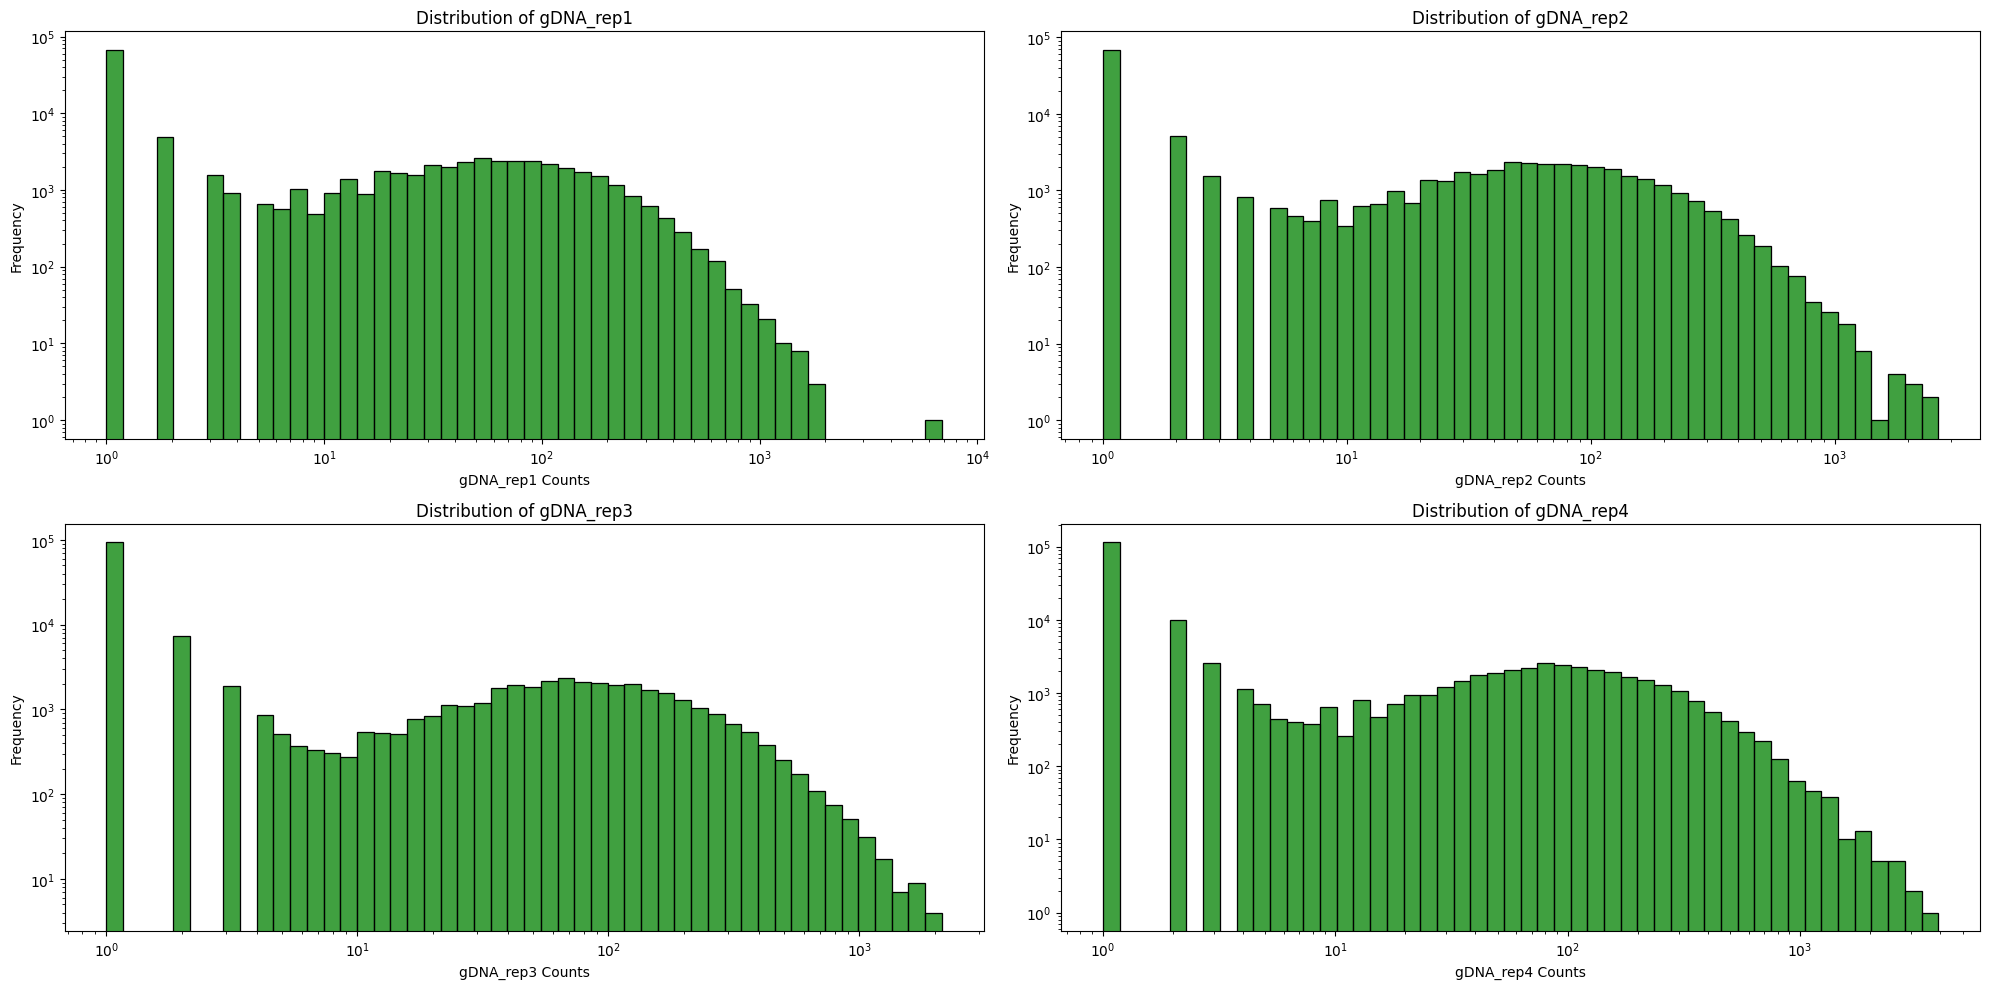

In [7]:
plt.figure(figsize=(20, 10))

for i, col in enumerate(gDNA_replicate_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(gDNA_visualization[col], bins=50, color='green', kde=False, log_scale=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col} Counts')
    plt.ylabel('Frequency')
    plt.yscale('log')

plt.tight_layout()
plt.show()

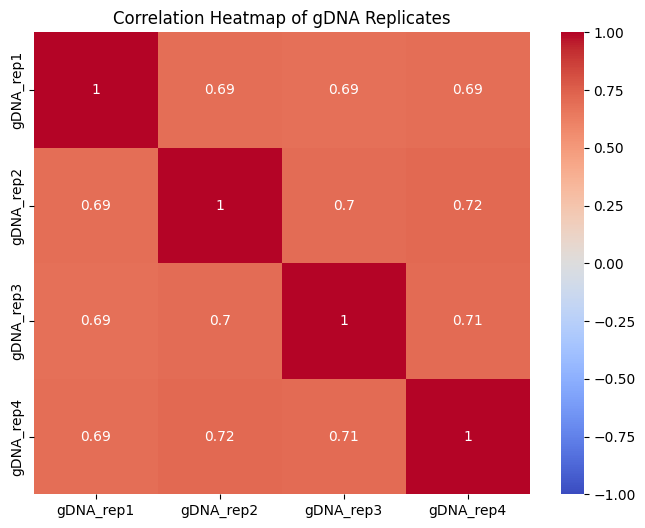

In [8]:
corr_matrix = gDNA_visualization[gDNA_replicate_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of gDNA Replicates')

plt.show()

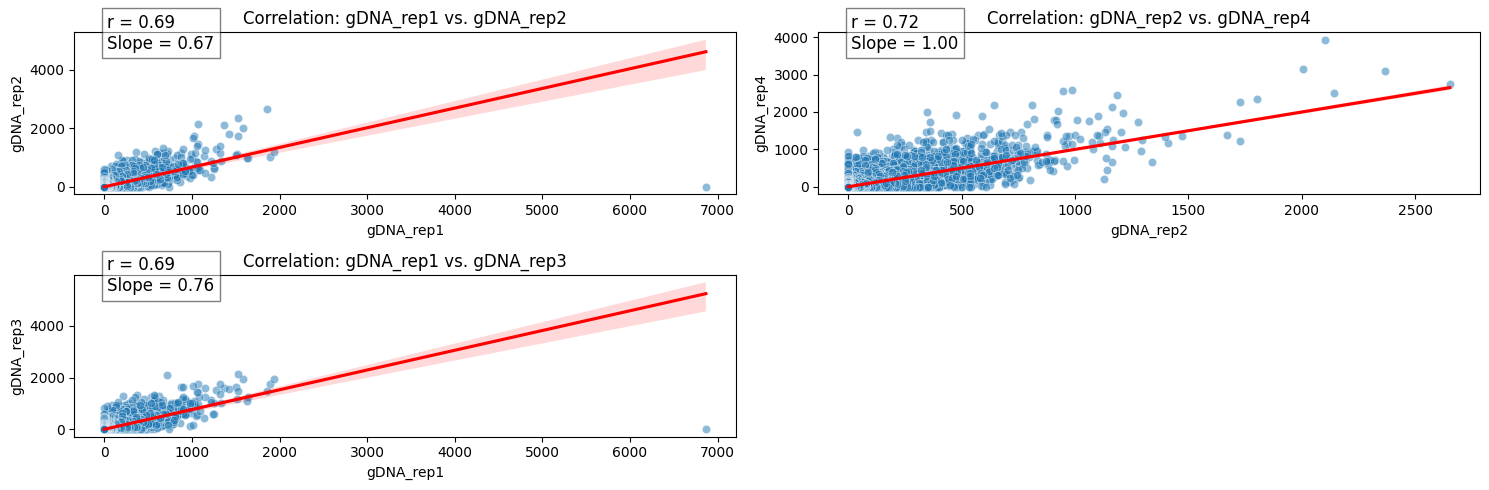

In [9]:
replicate_pairs = [("gDNA_rep1", "gDNA_rep2"), 
                   ("gDNA_rep2", "gDNA_rep4"), 
                   ("gDNA_rep1", "gDNA_rep3")]

plt.figure(figsize=(15, 5))

for i, (rep1, rep2) in enumerate(replicate_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=gDNA_counts[rep1], y=gDNA_counts[rep2], alpha=0.5)
    
    sns.regplot(x=gDNA_counts[rep1], y=gDNA_counts[rep2], scatter=False, color="red")

    r_value, p_value = stats.pearsonr(gDNA_counts[rep1], gDNA_counts[rep2])
    slope, intercept, _, _, _ = stats.linregress(gDNA_counts[rep1], gDNA_counts[rep2])

    plt.text(0.05, 0.9, f"r = {r_value:.2f}\nSlope = {slope:.2f}", 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.xlabel(rep1)
    plt.ylabel(rep2)
    plt.title(f"Correlation: {rep1} vs. {rep2}")

plt.tight_layout()
plt.show()

In [10]:
mRNA_counts

,sequence,mRNA_rep1,mRNA_rep2,mRNA_rep3,mRNA_rep4
0,CCCCACCCAAGC,2664,2831,3139,2462
1,TCTATGCATGCA,86,31,0,99
2,ATCACGGAAAAC,1576,2110,1725,2124
3,AGTGTGGCTGTT,1094,990,883,1171
4,TTCAGCACGAAT,1014,836,882,876
...,...,...,...,...,...
306492,GTGTACACAGTT,0,0,0,1
306493,CGGGGCAACAAG,0,0,0,1
306494,TGTGAGCAGTCA,0,0,0,1
306495,GGGTACAAATGC,0,0,0,1


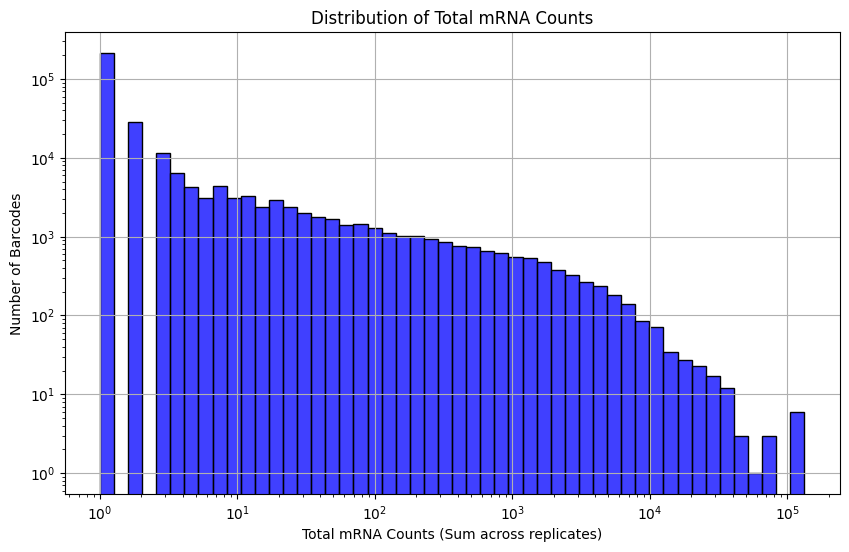

In [11]:
mRNA_visualization = mRNA_counts.copy()
mRNA_replicate_cols = ['mRNA_rep1', 'mRNA_rep2', 'mRNA_rep3', 'mRNA_rep4']

mRNA_visualization['Total_mRNA_Count'] = mRNA_visualization[mRNA_replicate_cols].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(mRNA_visualization['Total_mRNA_Count'], bins=50, color='blue', kde=False, log_scale=True)

plt.xlabel('Total mRNA Counts (Sum across replicates)')
plt.ylabel('Number of Barcodes')
plt.title('Distribution of Total mRNA Counts')

plt.xticks()
plt.yticks()
plt.yscale('log')
plt.grid(True)
plt.show()

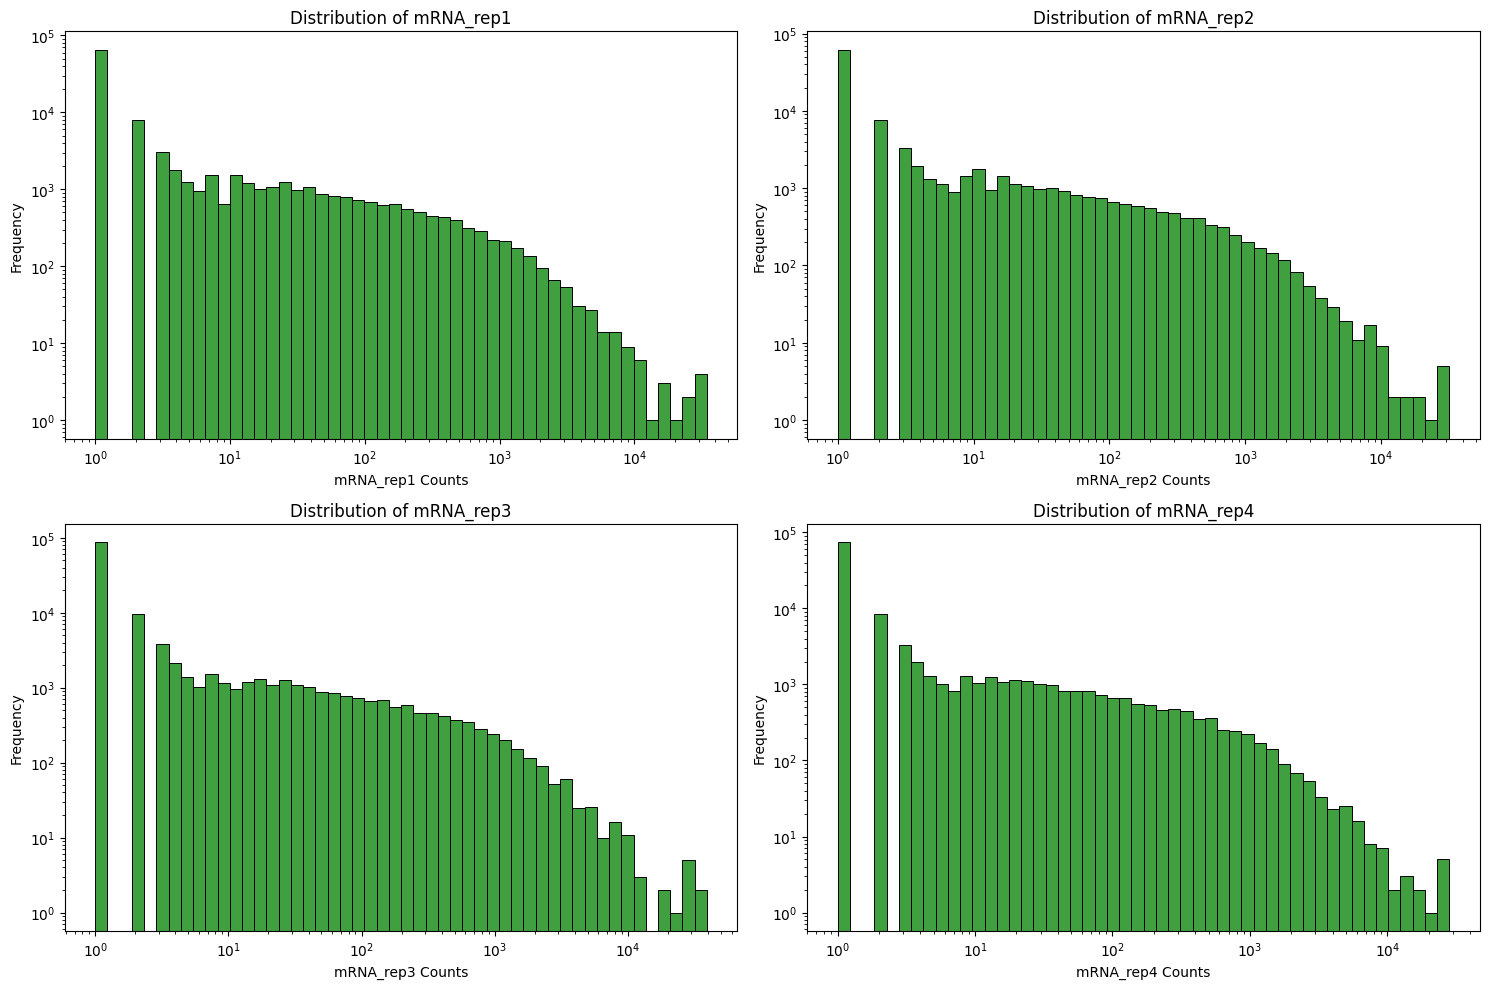

In [12]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(mRNA_replicate_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(mRNA_visualization[col], bins=50, color='green', kde=False, log_scale=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f'{col} Counts')
    plt.ylabel('Frequency')
    plt.yscale('log')

plt.tight_layout()
plt.show()

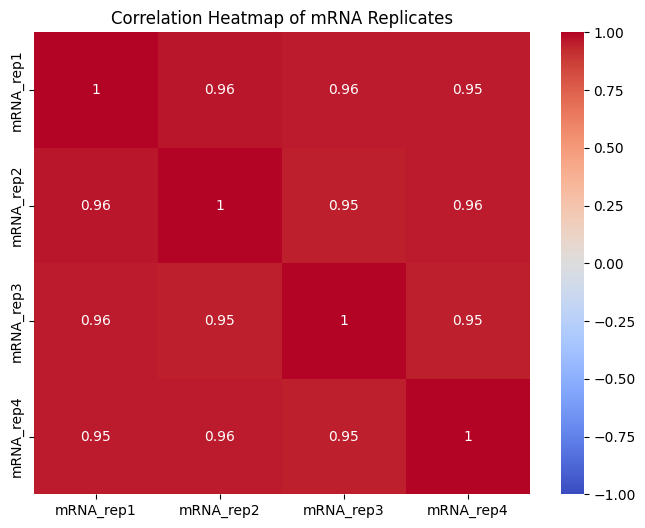

In [13]:
corr_matrix = mRNA_visualization[mRNA_replicate_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

plt.title('Correlation Heatmap of mRNA Replicates')

plt.show()

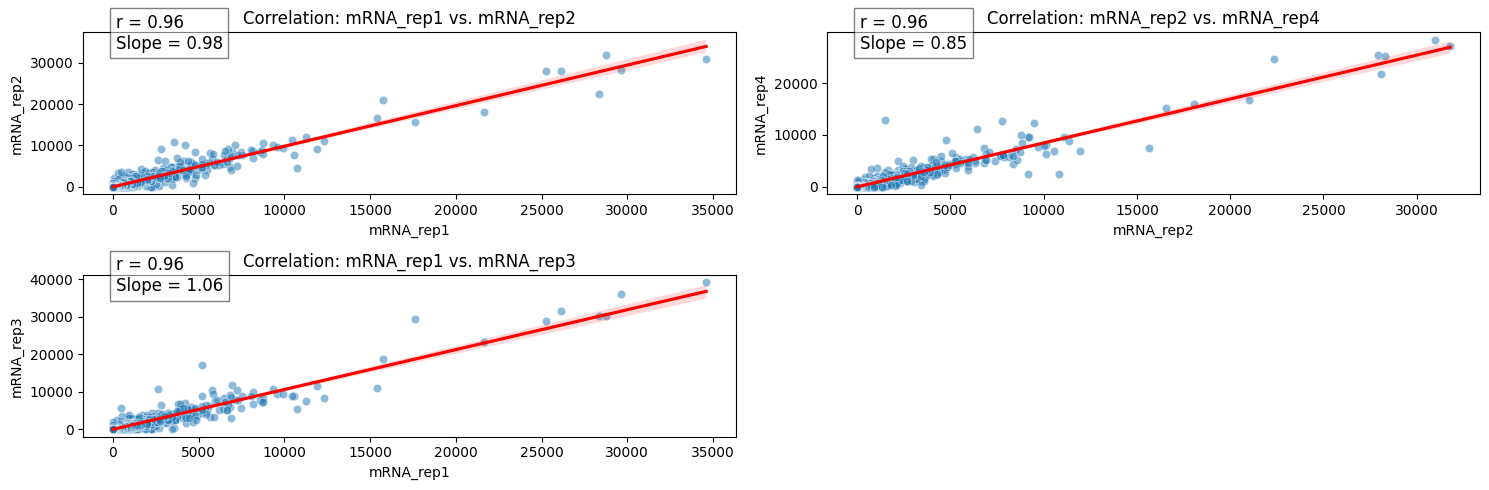

In [14]:
replicate_pairs = [("mRNA_rep1", "mRNA_rep2"), 
                   ("mRNA_rep2", "mRNA_rep4"), 
                   ("mRNA_rep1", "mRNA_rep3")]

plt.figure(figsize=(15, 5))

for i, (rep1, rep2) in enumerate(replicate_pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=mRNA_counts[rep1], y=mRNA_counts[rep2], alpha=0.5)
    
    sns.regplot(x=mRNA_counts[rep1], y=mRNA_counts[rep2], scatter=False, color="red")

    r_value, p_value = stats.pearsonr(mRNA_counts[rep1], mRNA_counts[rep2])
    slope, intercept, _, _, _ = stats.linregress(mRNA_counts[rep1], mRNA_counts[rep2])

    plt.text(0.05, 0.9, f"r = {r_value:.2f}\nSlope = {slope:.2f}", 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.xlabel(rep1)
    plt.ylabel(rep2)
    plt.title(f"Correlation: {rep1} vs. {rep2}")

plt.tight_layout()
plt.show()

In [15]:
barcode_mapping

,BC,Freq,Enhancer
0,AAAAAAAAGCCC,42,PU1_PU1_PU1_1
1,AAAAAAACCCTA,1,FOXO_MYC_FOXO_1
2,AAAAAAAGACGG,1,MYC_MYC_MYC_3
3,AAAAAAAGCTCC,17,RUNX3_MYC_RUNX3_3
4,AAAAAAAGGTAA,1,MEF2_CTCF_1
...,...,...,...
358724,TTTTTTTTCGAA,1,PU1_RUNX3_PU1_3
358725,TTTTTTTTGCTA,1,CTCF_IRF_CTCF_2
358726,TTTTTTTTTCAT,1,RUNX3_RUNX3_RUNX3_3
358727,TTTTTTTTTTGA,1,NFKB_RUNX3_1


In [22]:
# filtering to keep only barcodes with a total count of 10 across all replicates, and this 10 must come from at least 2 replicates, so 12 0 0 isn't allowed

replicate_columns = ['gDNA_rep1', 'gDNA_rep2', 'gDNA_rep3', 'gDNA_rep4']

# compute total counts per barcode
gDNA_counts['total_counts'] = gDNA_counts[replicate_columns].sum(axis=1)

# how many replicates contribute to the total
gDNA_counts['nonzero_replicates'] = (gDNA_counts[replicate_columns] > 0).sum(axis=1)

# total count ≥ 100 and at least 2 replicates contribute
gDNA_counts_filtered = gDNA_counts[(gDNA_counts['total_counts'] >= 100) & (gDNA_counts['nonzero_replicates'] >= 2)]

gDNA_counts_filtered = gDNA_counts_filtered.drop(columns=['total_counts', 'nonzero_replicates'])


In [23]:
gDNA_counts_filtered

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,gDNA_rep4
0,TAGTCTGATTCC,66,0,7,113
2,TTGCCGTCGTAG,45,99,42,0
3,TGCTAAACCATG,442,201,146,184
4,TTCGCACCATAT,236,0,406,487
5,ATAGCCATCAAC,28,179,57,83
...,...,...,...,...,...
267720,CTCCCGAGTGCC,0,0,1,209
270987,CAGCCGGGGCAG,0,0,2,235
274082,CACAGCTGAGTG,0,0,1,141
281490,TCCATGGTACTC,0,0,1,109


In [24]:
# let's see how many intersect
print(len(set(gDNA_counts_filtered['sequence']) & set(mRNA_counts['sequence'])))

19285


In [25]:
barcode_counts = pd.merge(gDNA_counts_filtered, mRNA_counts, on='sequence')

In [26]:
barcode_counts
# indeed, the correct number of intersected barcodes found in both gDNA and mRNA

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,gDNA_rep4,mRNA_rep1,mRNA_rep2,mRNA_rep3,mRNA_rep4
0,TGCTAAACCATG,442,201,146,184,0,0,59,0
1,TTCGCACCATAT,236,0,406,487,152,368,281,274
2,GTACTAAGTCGC,136,399,507,409,40,83,44,29
3,TCGCATGTGGGG,284,693,214,139,0,3,0,0
4,GGCGGAGCTGTC,232,108,234,568,0,0,31,0
...,...,...,...,...,...,...,...,...,...
19280,GGAGTAACGACC,0,0,1,118,77,19,34,18
19281,TCGTGGGGGCGT,0,0,1,153,0,4,1,41
19282,GCGCAATGTCTT,0,0,1,112,370,377,698,205
19283,CAGCCGGGGCAG,0,0,2,235,45,0,14,17


In [29]:
# for any mRNA_replicate{i} and gDNA_replicate{i}, if the mRNA value is > 0 and the gDNA value is = 0, set the mRNA value = 0

for i in range(1, 5): # looping over the replicate columns
    gDNA_col = f"gDNA_rep{i}"
    mRNA_col = f"mRNA_rep{i}"
    
    # If gDNA is 0 but mRNA is positive, set mRNA to 0
    barcode_counts.loc[barcode_counts[gDNA_col] == 0, mRNA_col] = 0

In [30]:
barcode_counts

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,gDNA_rep4,mRNA_rep1,mRNA_rep2,mRNA_rep3,mRNA_rep4
0,TGCTAAACCATG,442,201,146,184,0,0,59,0
1,TTCGCACCATAT,236,0,406,487,152,0,281,274
2,GTACTAAGTCGC,136,399,507,409,40,83,44,29
3,TCGCATGTGGGG,284,693,214,139,0,3,0,0
4,GGCGGAGCTGTC,232,108,234,568,0,0,31,0
...,...,...,...,...,...,...,...,...,...
19280,GGAGTAACGACC,0,0,1,118,0,0,34,18
19281,TCGTGGGGGCGT,0,0,1,153,0,0,1,41
19282,GCGCAATGTCTT,0,0,1,112,0,0,698,205
19283,CAGCCGGGGCAG,0,0,2,235,0,0,14,17


In [31]:
mapped_barcodes = pd.merge(barcode_counts, barcode_mapping[['BC', 'Enhancer']], left_on='sequence', right_on='BC', how='inner')

mapped_barcodes.drop(columns=['BC'], inplace=True)

In [36]:
mapped_barcodes

,sequence,gDNA_rep1,gDNA_rep2,gDNA_rep3,gDNA_rep4,mRNA_rep1,mRNA_rep2,mRNA_rep3,mRNA_rep4,Enhancer
0,TGCTAAACCATG,442,201,146,184,0,0,59,0,FOXO_NFKB_3
1,TTCGCACCATAT,236,0,406,487,152,0,281,274,PU1_MYC_PU1_3
2,GGCGGAGCTGTC,232,108,234,568,0,0,31,0,PU1_IRF_3
3,AGCTATGTCGTA,49,98,19,142,0,7,39,0,IRF_FOXO_IRF_1
4,TGCGAGCGATTG,506,410,481,974,4554,5942,5829,4088,NFKB_NFKB_NFKB_3
...,...,...,...,...,...,...,...,...,...,...
7282,CTAACCTGTTCA,0,0,2,197,0,0,585,739,PU1_NFKB_PU1_3
7283,AGCTCTTGTCCG,0,0,1,148,0,0,0,2,FOXO_CTCF_3
7284,AGTTAACACGAC,0,0,1,183,0,0,442,314,NFKB_PU1_NFKB_3
7285,GGAGTAACGACC,0,0,1,118,0,0,34,18,MYC_2
